In [1]:
"""Libraries"""

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
import numpy as np 
import time
import os
import random
from multiprocessing import Pool
import importlib

# my own file:
import diffeq_original as de
importlib.reload(de)

<module 'diffeq_original' from 'C:\\Users\\P\\OneDrive - Budapesti Műszaki és Gazdaságtudományi Egyetem\\TDK\\diffeq_original.py'>

In [3]:
#best_par = [0.0, 4.045621302769317e-07, 29.948877815255923, 8999916.500369592, 0.05011823420486024, 322.54426787856244, 11982.847622396348, 9.0, 0.2520615703243079]
best_par = [0, 1.6736842105263158e-06, 30.0, 10000000.0, 0.05, 323.15, 12349.40351028322, 9.0, 0.25]
[ID, best_R_E, best_ratio, best_P_inf, best_alfa_M, best_T_inf, P_v, best_index, best_surfactant] = best_par
best_Energy = de.solve(best_par)[17]

param_names = ['R_E', 'R_0/R_E', 'P_\infty', '\alpha_M', 'T_\infty', 'surfactant']
param_units = ['m', '-', 'Pa', '-', 'K', '-']
param_labels = ['$R_E \ [m]$', '$R_0/R_E \ [-]$', '$P_\infty \ [Pa]$', '$α_M \ [-]$', '$T_\infty \ [K]$', '$surfactant \ [-]$']
param_ranges = [
    # R_E Equilibrium radius [um --> m]
    [1e-6*x for x in np.linspace(0.1, 0.4, 10)] + [1e-6*x for x in np.linspace(0.4, 4.0, 10)] + [1e-6*x for x in np.linspace(4.0, 30.0, 30)],
    # R_0 / R_E ratio [-]
    [x for x in np.linspace(1.5, 10.0, 25)] + [x for x in np.linspace(10.0, 30.0, 20)],
    # P_inf Ambient pressure [Pa]
    [1e5*x for x in np.linspace(1.0, 100.0, 30)],
    # alfa_M Accommodation coeff. for evaporation [-]
    [x for x in np.linspace(0.05, 0.35, 10)],
    # T_inf Ambient temperature [°C --> K]
    [273.15+x for x in np.linspace(5, 50, 20)],
    # surfactant Surface tension modifier [-]
    [x for x in np.linspace(0.25, 1, 10)],
]

In [3]:
Energys = []
num = 0
for a in param_ranges:
    for b in a:
        num += 1
n = 1

for i in range(len(param_names)):
    param_name = param_names[i]
    param_unit = param_units[i]
    param_range = param_ranges[i]
    parameters = []
    Energy = []
    
    for param in param_range:
        best_par = [best_R_E, best_ratio, best_P_inf, best_alfa_M, best_T_inf, best_surfactant]
        best_par[i] = param
        parameter = [0, best_par[0], best_par[1], best_par[2], best_par[3], best_par[4], de.VapourPressure(best_par[4]), best_index, best_par[5]]
        
        parameters.append(parameter)
 
    with Pool(processes=3) as pool:
        results = pool.imap(de.solve, parameters)

        for data in results:
            Energy.append(abs(data[17]))
            print(f'{n}/{num}   error: {data[1]},   steps: {data[2]},   runtime: {data[3]} s   |   R_E={data[4]*1e6} [um]; ' + 
                      f'ratio={data[5]}; P_inf={data[6]}; alfa_M={data[7]}; T_inf={data[8]} [K]; index={data[10]}; surfactant={data[11]};   Energy={data[17]: .0f} [MJ/kg]' +
                      '                                        ', end='\r')
            n += 1
            
    Energys.append(Energy)

<ipython-input-20-8330165610f7>:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


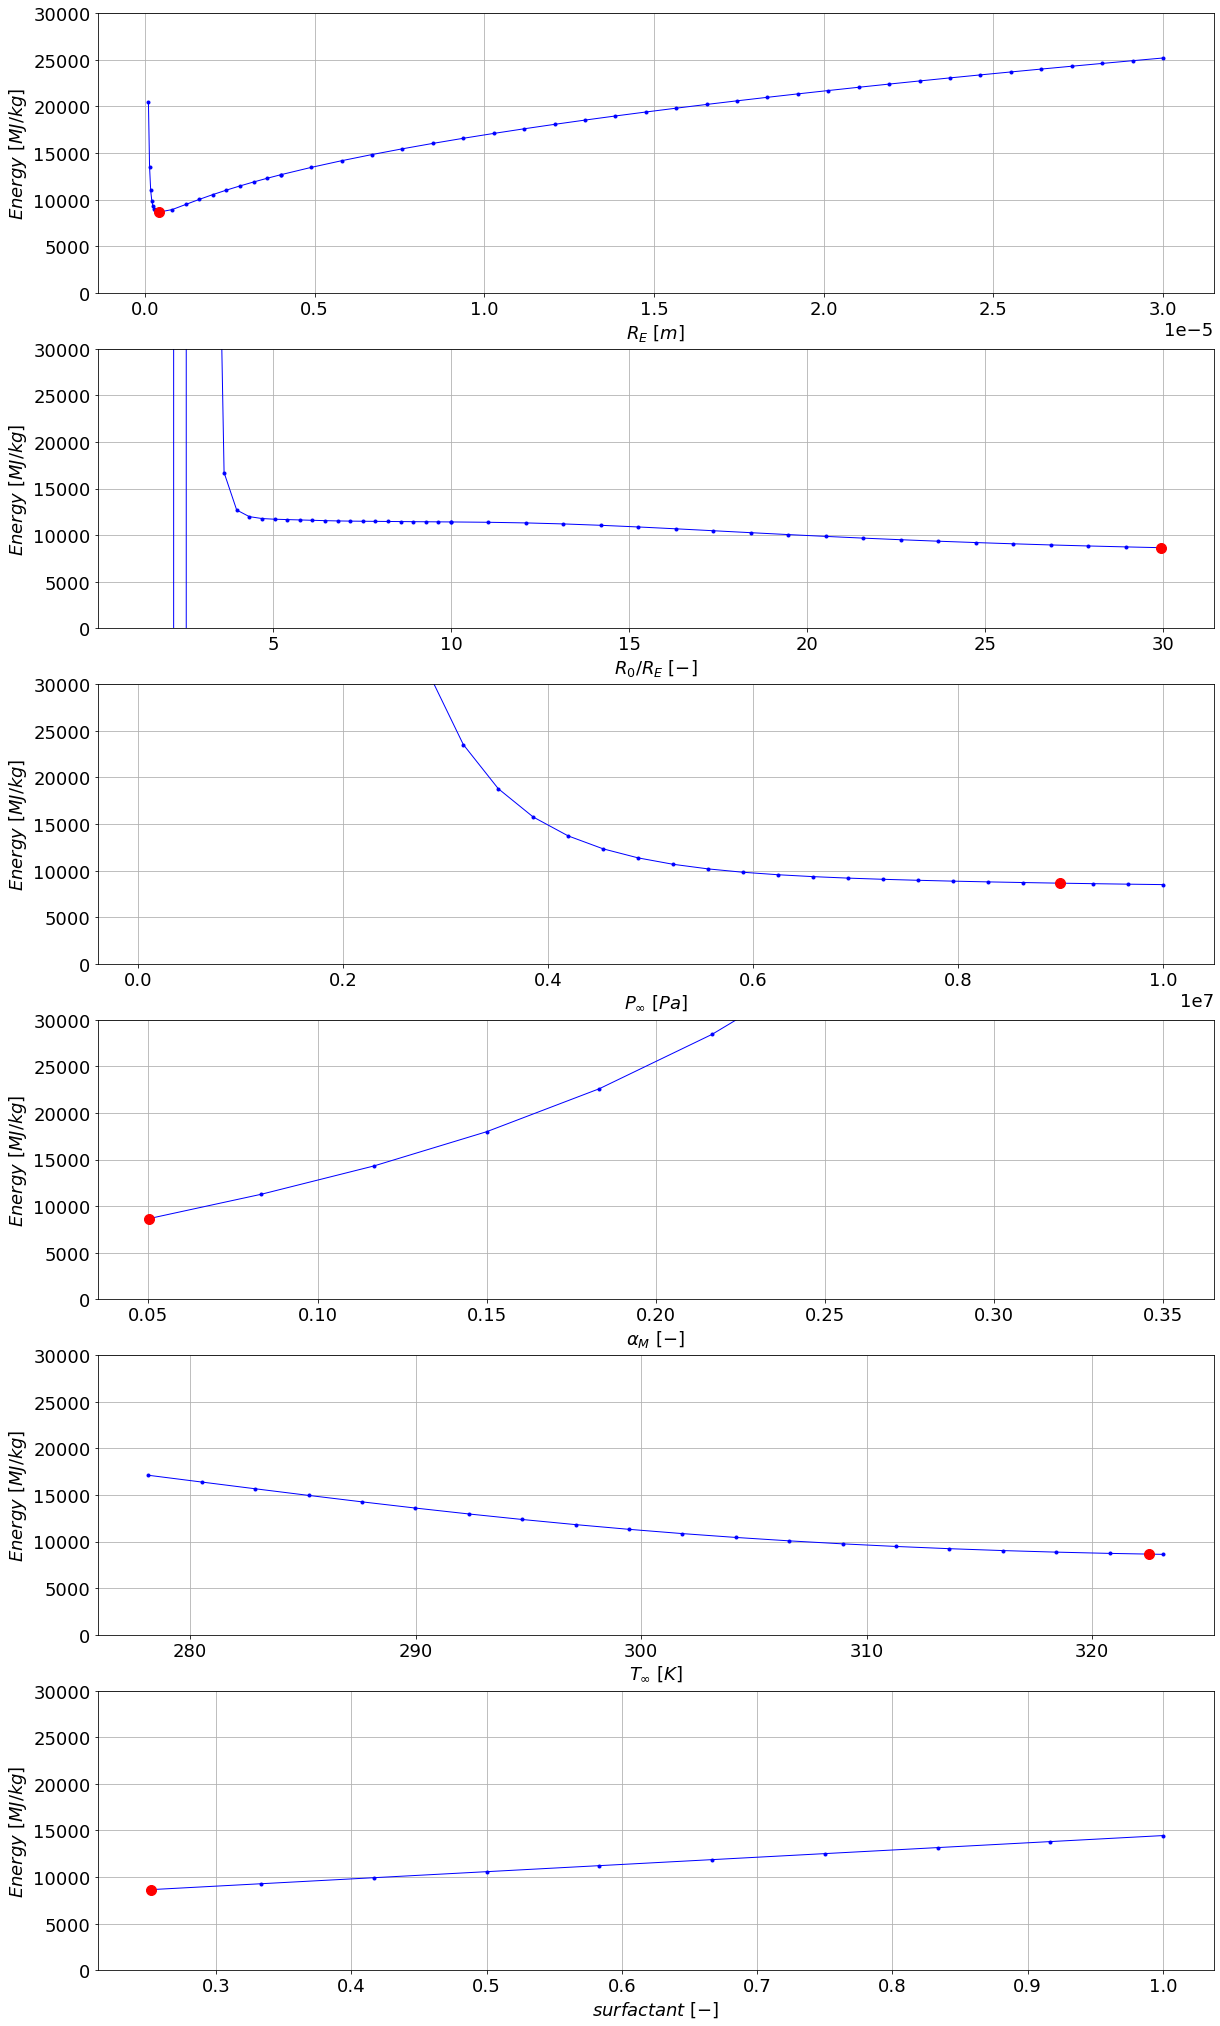

In [20]:
best_par = [best_R_E, best_ratio, best_P_inf, best_alfa_M, best_T_inf, best_surfactant]
flat_Energys = [item for sublist in Energys for item in sublist]
flat_Energys.sort()
flat_Energys = flat_Energys[:-10]
minE = max(min(flat_Energys), 0)
maxE = min(max(flat_Energys), 30000)
n = len(param_ranges)

fig, ax = plt.subplots(n, 1, figsize=(20, 6*n))

for i in range(n):
    ax[i].plot(param_ranges[i], Energys[i], '.-', color='b', linewidth=1.0)
    ax[i].set_ylabel('$Energy \ [MJ/kg]$')
    ax[i].set_xlabel(param_labels[i])
    ax[i].set_ylim([minE, maxE])
    ax[i].grid()
    ax[i].plot(best_par[i], best_Energy, markersize=10, marker="o", color='r')

fig.show()
if True:
    fig.savefig('images/Energy_param_plot_ps2.png')

In [76]:
#best_par = [0.0, 4.045621302769317e-07, 29.948877815255923, 8999916.500369592, 0.05011823420486024, 322.54426787856244, 11982.847622396348, 9.0, 0.2520615703243079]
best_par = [0, 1.6736842105263158e-06, 30.0, 10000000.0, 0.05, 323.15, 12349.40351028322, 9.0, 0.25]
[ID, best_R_E, best_ratio, best_P_inf, best_alfa_M, best_T_inf, P_v, best_index, best_surfactant] = best_par
best_Energy = de.solve(best_par)[17]

param_names = ['R_E', 'P_\infty']
param_units = ['m', 'Pa']
param_labels = ['$R_E \ [m]$', '$P_\infty \ [Pa]$']
param_ranges = [
    # R_E Equilibrium radius [um --> m]
    [1e-6*x for x in np.linspace(0.1, 0.4, 6)] + [1e-6*x for x in np.linspace(0.4, 6.0, 18)] + [1e-6*x for x in np.linspace(6.0, 30.0, 10)],
    # P_inf Ambient pressure [Pa]
    [1e5*x for x in [10, 15, 20, 25, 30, 50, 75, 100]],
]
len(param_ranges[0]) * len(param_ranges[1])

272

In [77]:
Energys = []
parameters = []
num = len(param_ranges[0]) * len(param_ranges[1])
n = 1

for R_E in param_ranges[0]:
    for P_inf in param_ranges[1]:
        parameter = [0, R_E, best_ratio, P_inf, best_alfa_M, best_T_inf, de.VapourPressure(best_T_inf), best_index, best_surfactant]
        parameters.append(parameter)

with Pool(processes=3) as pool:
    results = pool.imap(de.solve, parameters)

    for data in results:
        Energys.append(abs(data[17]))
        print(f'{n}/{num}   error: {data[1]},   steps: {data[2]},   runtime: {data[3]} s   |   R_E={data[4]*1e6} [um]; ' + 
                  f'ratio={data[5]}; P_inf={data[6]}; alfa_M={data[7]}; T_inf={data[8]} [K]; index={data[10]}; surfactant={data[11]};   Energy={data[17]: .0f} [MJ/kg]' +
                      '                                        ', end='\r')
        n += 1

<ipython-input-79-76d906c947dd>:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


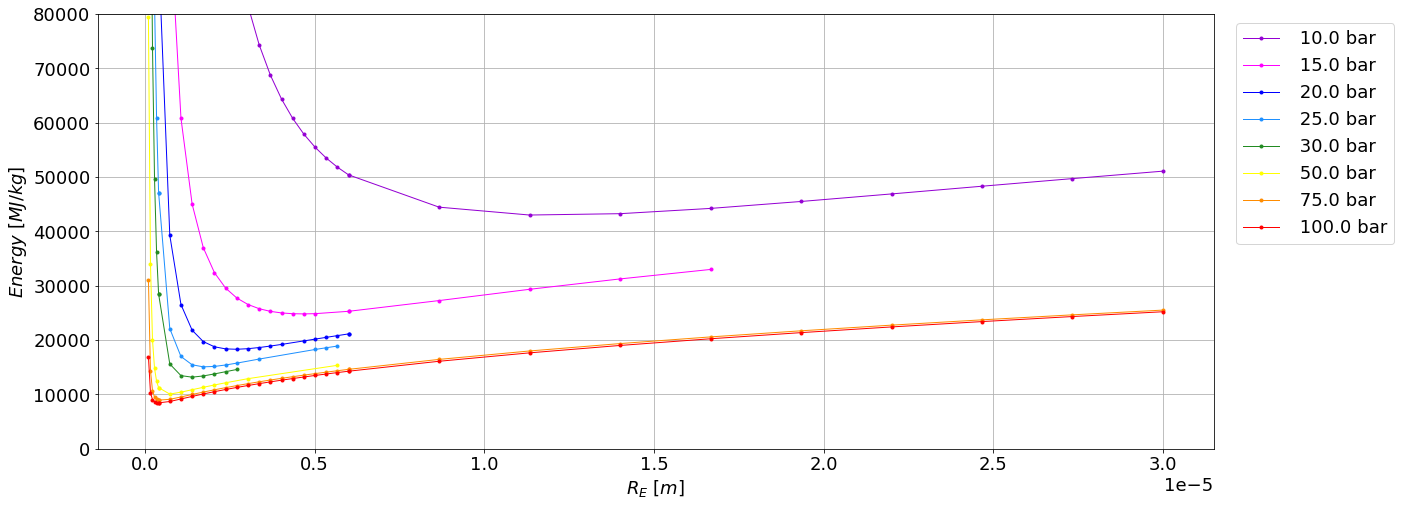

In [79]:
flat_Energys = [E for E in Energys]
flat_Energys.sort()
flat_Energys = flat_Energys[:-1]
minE = 0#max(min(flat_Energys), 0)
maxE = 80e3#min(max(flat_Energys), 80e3)
n = len(param_ranges[1])
Energy_seperated = []
radiuses = []
for P_inf in param_ranges[1]:
    Energy_seperated.append(
        [E for E, parameter in zip(Energys, parameters) if parameter[3]==P_inf and E!=1e30]
    )
    radiuses.append(
        [parameter[1] for E, parameter in zip(Energys, parameters) if parameter[3]==P_inf and E!=1e30]
    )

fig, ax = plt.subplots(1, 1, figsize=(20, 8))
ax.set_ylabel('$Energy \ [MJ/kg]$')
ax.set_xlabel('$R_E \ [m]$')
ax.set_ylim([minE, maxE])
ax.grid()

#colors = ['darkviolet', 'magenta', 'blue', 'dodgerblue', 'lime', 'forestgreen', 'yellow', 'gold', 'darkorange', 'red']
colors = ['darkviolet', 'magenta', 'blue', 'dodgerblue', 'forestgreen', 'yellow', 'darkorange', 'red']
for i in range(n):
    ax.plot(radiuses[i], Energy_seperated[i], '.-', color=colors[i], linewidth=1.0)
    
ax.legend([f'{P_inf*1e-5: .1f} bar' for P_inf in param_ranges[1]], loc ="upper right", bbox_to_anchor=(1.17, 1))
fig.show()
if True:
    fig.savefig('images/Energy R_E P_inf.png')

In [75]:
[(r, e) for (r, e) in zip(radiuses[3], Energy_seperated[3])]

[(1e-07, 116614.70444692031),
 (1.7500000000000002e-07, 51531.691798336324),
 (2.5e-07, 27630.2236936518),
 (3.2500000000000006e-07, 19078.148512335665),
 (4e-07, 15276.31153428844),
 (4e-07, 15276.31153428844),
 (6.571428571428572e-07, 11514.475571509498),
 (9.142857142857143e-07, 11112.772933269775),
 (1.1714285714285717e-06, 11314.942001869218),
 (1.4285714285714288e-06, 11642.048868085194),
 (1.6857142857142858e-06, 11989.370695951182),
 (1.942857142857143e-06, 12332.227814696693),
 (2.2e-06, 12664.531623354555),
 (2.4571428571428573e-06, 12984.961661013256),
 (2.7142857142857144e-06, 13293.63189802625),
 (3.2285714285714283e-06, 13878.185642054954)]